## Plotting the Protein Clusters 

In [1]:

# load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(tidyverse)
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(future)
quiet_library(future.apply)
quiet_library(SingleCellExperiment)
quiet_library(SeuratDisk)
quiet_library(ggpubr)
quiet_library(knitr)
quiet_library(plotly)
quiet_library(lme4)
quiet_library(ggpubr)
quiet_library(ggrepel)
quiet_library(ggthemes)
quiet_library(GSVA)
quiet_library(tidyr)
quiet_library(SummarizedExperiment)

In [2]:
# Check number of cores
future::availableCores()
# Set up parallel processing to run when using 'future' functions 
future::plan(strategy = "multicore", workers = future::availableCores()-5)  
options(future.globals.maxSize = 1000 * 1024^3)
# to turn off parallel processing run line below
# future::plan(strategy = "sequential")

system 
    64

In [3]:
# define the color palette to be used
npg_color <- c("#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", 
               "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF")
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c("#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", 
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999", 
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")

cluster_colors_ext <- colorRampPalette(cluster_colors)(75)
options(repr.plot.width = 5, repr.plot.height = 5)

In [4]:
## reading the protein cluster results
ol=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/olink_validation/2024-04-24_samplesByCluster_noConv.csv")
ol%>%head(3)
ol%>%dim

,Order,Cluster,subject.SubjectGuid,sample.sampleKitGuid,Subject_Sample
,<int>,<chr>,<chr>,<chr>,<chr>
1,85,C1,CU1101,KT04671,CU1101_KT04671
2,86,C1,CU1104,KT04905,CU1104_KT04905
3,78,C1,CU1092,KT04652,CU1092_KT04652


[1] 93  5

In [5]:
## reading the metadata ALTRA metadata file
altra_csv=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_notebooks/files/input_files/certpro_Zi_files/Figure_input_files/ALTRA_Fig1_Master_meta
                    .csv")
altra_csv%>%head()
altra_csv%>%colnames%>%sort()

,X,Status_Xsec,Status_Long,sample.sampleKitGuid,sample.drawDate,sample.daysSinceFirstVisit,subject.subjectGuid,subject.biologicalSex,subject.birthYear,days_to_conversion,number_of_days_to_from_ra_conversion_cu,anti_ccp3_finalCombined,status,time,s1,s1_ids,Status_new
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>
1,1,ALTRA_healthy,NA,KT02284,2022-10-01,0,SD1021,Female,1971,NA,NA,0,ALTRA_healthy,-2000,CON1,CON101,CON1
2,2,ALTRA_healthy,NA,KT02286,2022-08-01,0,SD1022,Female,1985,NA,NA,2,ALTRA_healthy,-2000,CON1,CON102,CON1
3,3,ALTRA_healthy,NA,KT02287,2022-05-01,0,SD1015,Female,1963,NA,NA,0,ALTRA_healthy,-2000,CON1,CON103,CON1
4,4,ALTRA_healthy,NA,KT02292,2022-09-01,0,SD1020,Female,1986,NA,NA,3,ALTRA_healthy,-2000,CON1,CON104,CON1
5,5,ALTRA_healthy,NA,KT02298,2022-09-01,0,SD1026,Female,1965,NA,NA,NA,ALTRA_healthy,-2000,CON1,CON105,CON1
6,6,ALTRA_healthy,NA,KT02303,2022-09-01,0,SD1024,Female,1944,NA,NA,4,ALTRA_healthy,-2000,CON1,CON106,CON1


[1] "anti_ccp3_finalCombined"                
 [2] "days_to_conversion"                     
 [3] "number_of_days_to_from_ra_conversion_cu"
 [4] "s1"                                     
 [5] "s1_ids"                                 
 [6] "sample.daysSinceFirstVisit"             
 [7] "sample.drawDate"                        
 [8] "sample.sampleKitGuid"                   
 [9] "status"                                 
[10] "Status_Long"                            
[11] "Status_new"                             
[12] "Status_Xsec"                            
[13] "subject.biologicalSex"                  
[14] "subject.birthYear"                      
[15] "subject.subjectGuid"                    
[16] "time"                                   
[17] "X"

In [6]:
## Subsetting the altra_csv 
altra_sub=altra_csv%>%select(Status_Xsec,Status_Long,status,s1_ids,sample.sampleKitGuid,s1)
altra_sub%>%head(3)

,Status_Xsec,Status_Long,status,s1_ids,sample.sampleKitGuid,s1
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,ALTRA_healthy,NA,ALTRA_healthy,CON101,KT02284,CON1
2,ALTRA_healthy,NA,ALTRA_healthy,CON102,KT02286,CON1
3,ALTRA_healthy,NA,ALTRA_healthy,CON103,KT02287,CON1


In [7]:
## merging 2 dfs for plotting 
olink_df=left_join(ol,altra_sub,by="sample.sampleKitGuid")

In [8]:
olink_df%>%dim
olink_df%>%head()

[1] 93 10

,Order,Cluster,subject.SubjectGuid,sample.sampleKitGuid,Subject_Sample,Status_Xsec,Status_Long,status,s1_ids,s1
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,85,C1,CU1101,KT04671,CU1101_KT04671,ALTRA_healthy,NA,ALTRA_healthy,CON132,CON1
2,86,C1,CU1104,KT04905,CU1104_KT04905,ALTRA_healthy,NA,ALTRA_healthy,CON134,CON1
3,78,C1,CU1092,KT04652,CU1092_KT04652,ALTRA_healthy,NA,ALTRA_healthy,CON129,CON1
4,42,C1,CU1034,KT00420,CU1034_KT00420,at_risk,NA,at_risk,ARI25,ARI
5,57,C1,CU1054,KT04115,CU1054_KT04115,ALTRA_healthy,NA,ALTRA_healthy,CON123,CON1
6,75,C1,CU1088,KT04633,CU1088_KT04633,ALTRA_healthy,NA,ALTRA_healthy,CON127,CON1


In [9]:
# Calculate proportions
df_proportion <- olink_df %>%
  group_by(Cluster, s1) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)
df_proportion

`summarise()` has grouped output by 'Cluster'. You can override using the
`.groups` argument.


Cluster,s1,count,percentage
<chr>,<chr>,<int>,<dbl>
C1,ARI,1,10.000000
C1,CON1,8,80.000000
C1,ERA,1,10.000000
C2,ARI,7,28.000000
C2,CON1,15,60.000000
C2,ERA,3,12.000000
C3,ARI,3,27.272727
C3,CON1,7,63.636364
C3,ERA,1,9.090909


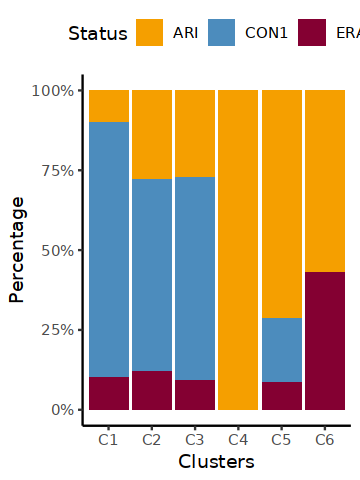

In [10]:
options(repr.plot.width = 3, repr.plot.height = 4)
p <- ggplot(df_proportion, aes(x = Cluster, y = percentage, fill = s1)) +
  geom_bar(stat = "identity") + 
  labs(x = "Clusters", y = "Percentage", fill = "Status") +
  scale_y_continuous(labels = scales::percent_format(scale = 1)) +
  scale_fill_manual(values = c("CON1" = "#4C8CBD", "ARI" = "#F59F00", "ERA" = "#840032")) +
  theme_classic() +
  theme(legend.position = "top")
p
# Save the plot
ggsave("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/Figure_S1G.pdf", plot = p, width = 3, height = 4, dpi = 300)

In [11]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/jupyter/libs/r_scrna/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] GSVA_1.48.3                 ggthemes_5.1.0             
 [3] ggrepel_0.9.5               lme4_1.1-34                
 [5] plotly_4.10.4               knitr_1.47                 
 [7] ggpubr_0.6.0                SeuratDisk_0.0.0.9021      
 [9] SingleCellExperiment_1.22.0 Summar